libraries dependencies


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import pickle
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report , accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
path = '/content/promoters.data'
names = ['Class', 'id', 'Sequence']
data = pd.read_csv(path, names = names)


In [ ]:
data.head(10)

,Class,id,Sequence
0,+,S10,\t\ttactagcaatacgcttgcgttcggtggttaagtatgtataat...
1,+,AMPC,\t\ttgctatcctgacagttgtcacgctgattggtgtcgttacaat...
2,+,AROH,\t\tgtactagagaactagtgcattagcttatttttttgttatcat...
3,+,DEOP2,\taattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaa...
4,+,LEU1_TRNA,\ttcgataattaactattgacgaaaagctgaaaaccactagaatgc...
5,+,MALEFG,\taggggcaaggaggatggaaagaggttgccgtataaagaaactag...
6,+,MALK,\t\tcagggggtggaggatttaagccatctcctgatgacgcatagt...
7,+,RECA,\t\ttttctacaaaacacttgatactgtatgagcatacagtataat...
8,+,RPOB,\t\tcgacttaatatactgcgacaggacgtccgttctgtgtaaatc...
9,+,RRNAB_P1,\tttttaaatttcctcttgtcaggccggaataactccctataatgc...


data understanding

In [ ]:
data.tail(10)

,Class,id,Sequence
96,-,648,\t\tccgagtagacccttagagagcatgtcagcctcgacaacttgc...
97,-,230,\t\tcgctaggactttcttgttgattttccatgcggtgttttgcgc...
98,-,1163,\t\ttatgaccgaacgagtcaatcagaccgctttgactctggtatt...
99,-,1321,\t\tagagggtgtactccaagaagaggaagatgaggctagacgtct...
100,-,663,\t\tgagagcatgtcagcctcgacaacttgcataaatgctttcttg...
101,-,799,\t\tcctcaatggcctctaaacgggtcttgaggggttttttgctga...
102,-,987,\t\tgtattctcaacaagattaaccgacagattcaatctcgtggat...
103,-,1226,\t\tcgcgactacgatgagatgcctgagtgcttccgttactggatt...
104,-,794,\t\tctcgtcctcaatggcctctaaacgggtcttgaggggtttttt...
105,-,1442,\t\ttaacattaataaataaggaggctctaatggcactcattagcc...


In [ ]:
data.shape # shape gives the dimentions of the data rows abd columns

(106, 3)

In [ ]:
data.dtypes

,0
Class,object
id,object
Sequence,object


data preprocessing



In [ ]:
#refining and structuring the data
#building our dataset using custom pands dataframe
Classes = data.loc[:,'Class']
Classes.head()
print(Classes.value_counts())

Class
+    53
-    53
Name: count, dtype: int64


In [ ]:
sequence = list(data.loc[:,'Sequence'])
sequence[-1]


'\t\ttaacattaataaataaggaggctctaatggcactcattagccaatcaatcaagaact'

In [ ]:
dic = {}
for i, seq in enumerate(sequence):
  nucleotide = list(seq) # 'ttdc..'-->['t','t','d','c']
  nucleotide = [char for char in nucleotide if char != '\t']# removing the \ t (tab) character
  #append class assignment
  nucleotide.append(Classes[i])

  dic[i] = nucleotide
list(dic[0])


['t',
 'a',
 'c',
 't',
 'a',
 'g',
 'c',
 'a',
 'a',
 't',
 'a',
 'c',
 'g',
 'c',
 't',
 't',
 'g',
 'c',
 'g',
 't',
 't',
 'c',
 'g',
 'g',
 't',
 'g',
 'g',
 't',
 't',
 'a',
 'a',
 'g',
 't',
 'a',
 't',
 'g',
 't',
 'a',
 't',
 'a',
 'a',
 't',
 'g',
 'c',
 'g',
 'c',
 'g',
 'g',
 'g',
 'c',
 't',
 't',
 'g',
 't',
 'c',
 'g',
 't',
 '+']

In [ ]:
#converting the dicnaory into dataframe
df = pd.DataFrame(dic)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,104,105
0,t,t,g,a,t,a,c,t,c,t,...,c,c,t,a,g,c,g,c,c,t
1,a,g,t,a,c,g,a,t,g,t,...,c,g,a,g,a,c,t,g,t,a
2,c,c,a,t,g,g,g,t,a,t,...,g,c,t,a,g,t,a,c,c,a
3,t,t,c,t,a,g,g,c,c,t,...,a,t,g,g,a,c,t,g,g,c
4,a,a,t,g,t,g,g,t,t,a,...,g,a,a,g,g,a,t,a,t,a


In [ ]:
df = df.transpose()
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,t,a,c,t,a,g,c,a,a,t,...,g,c,t,t,g,t,c,g,t,+
1,t,g,c,t,a,t,c,c,t,g,...,c,a,t,c,g,c,c,a,a,+
2,g,t,a,c,t,a,g,a,g,a,...,c,a,c,c,c,g,g,c,g,+
3,a,a,t,t,g,t,g,a,t,g,...,a,a,c,a,a,a,c,t,c,+
4,t,c,g,a,t,a,a,t,t,a,...,c,c,g,t,g,g,t,a,g,+


In [ ]:
df.rename(columns = {57:'Class'},inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,Class
0,t,a,c,t,a,g,c,a,a,t,...,g,c,t,t,g,t,c,g,t,+
1,t,g,c,t,a,t,c,c,t,g,...,c,a,t,c,g,c,c,a,a,+
2,g,t,a,c,t,a,g,a,g,a,...,c,a,c,c,c,g,g,c,g,+
3,a,a,t,t,g,t,g,a,t,g,...,a,a,c,a,a,a,c,t,c,+
4,t,c,g,a,t,a,a,t,t,a,...,c,c,g,t,g,g,t,a,g,+


In [ ]:
# Create a deep copy of the DataFrame 'df' to avoid modifying the original DataFrame.
# This ensures that any changes made to 'temp' won't affect 'df'.
temp = df.copy(deep=True)

# Drop the 'Class' column from the 'temp' DataFrame along the columns axis (axis=1).
# This is often done to prepare data for machine learning,
# where the target variable ('Class') is separated from the features.
temp = temp.drop(['Class'], axis = 1)

# Display the first 5 rows of the 'temp' DataFrame to inspect the changes.
temp.head()


,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,t,a,c,t,a,g,c,a,a,t,...,g,g,c,t,t,g,t,c,g,t
1,t,g,c,t,a,t,c,c,t,g,...,g,c,a,t,c,g,c,c,a,a
2,g,t,a,c,t,a,g,a,g,a,...,c,c,a,c,c,c,g,g,c,g
3,a,a,t,t,g,t,g,a,t,g,...,t,a,a,c,a,a,a,c,t,c
4,t,c,g,a,t,a,a,t,t,a,...,t,c,c,g,t,g,g,t,a,g


In [ ]:
# encoding (coverting the charater in categorical data) one hot encoding
enc = OneHotEncoder(handle_unknown = 'ignore')
enc.fit(temp)
print(enc.categories_)
df1=(enc.transform(temp).toarray())
del temp

[array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a'

In [ ]:
# Save the encoder (enc)
with open('encoder.pickle', 'wb') as f:
    pickle.dump(enc, f)


In [ ]:
df_new = pd.DataFrame(df1)
df_new.head()

,0,1,2,3,4,5,6,7,8,9,...,218,219,220,221,222,223,224,225,226,227
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
#fixing the class column and converting it to 0,1 formate
df['Class'] = df['Class'].replace(to_replace = ["+"], value = 1)
df['Class'] = df['Class'].replace(to_replace = ["-"], value = 0)
df_new["Classes"] = df['Class']
df_new.head()

<ipython-input-63-659cc406c187>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Class'] = df['Class'].replace(to_replace = ["-"], value = 0)


,0,1,2,3,4,5,6,7,8,9,...,219,220,221,222,223,224,225,226,227,Classes
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1


traning the model

In [ ]:
# Extract the target variable ('Classes') as a NumPy array for modeling
y = df_new['Classes'].values

# Extract the features (all columns except 'Classes') as a NumPy array for modeling
x = df_new.drop(['Classes'], axis=1).values

# Set a fixed seed for reproducibility of results
seed = 1

# Split the data into training (75%) and testing (25%) sets
# Ensures reproducibility using the fixed seed
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=seed)


In [ ]:
# Initialize an MLP classifier with three hidden layers (150, 100, 50 neurons),
# 300 maximum iterations, ReLU activation, and the Adam optimizer
model = MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300, activation='relu',solver='adam', random_state=1)# relu=(Rectified Linear Unit) is widely used in deep learning due to its efficiency and effectiveness in handling non-linearity.
                                      # adam =  (Adaptive Moment Estimation) is a gradient-based optimizer suitable for neural networks.


# Train the MLP classifier traning data ko use kar ke
model.fit(x_train, y_train)

# Print the accuracy of the trained model on the training dataset
print(model.score(x_train, y_train))


1.0


In [ ]:
#predicting the y for x value
y_pred = model.predict(x_test)
model.score(x_test, y_test)

0.9259259259259259

In [ ]:
#moddel evaluation
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        17
           1       0.83      1.00      0.91        10

    accuracy                           0.93        27
   macro avg       0.92      0.94      0.92        27
weighted avg       0.94      0.93      0.93        27



<Axes: >

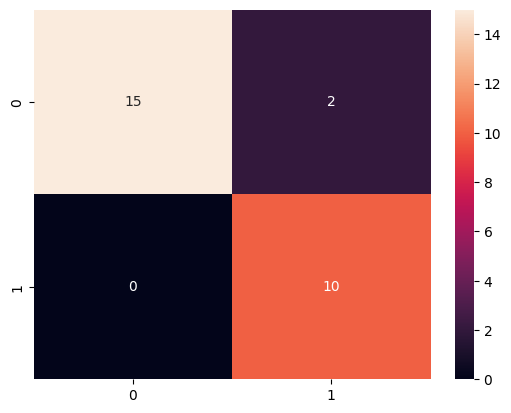

In [ ]:
#importing confution matrix
#comparing the prediction against the actual observation in y_val
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm , annot = True) #15 prect true 2 where false

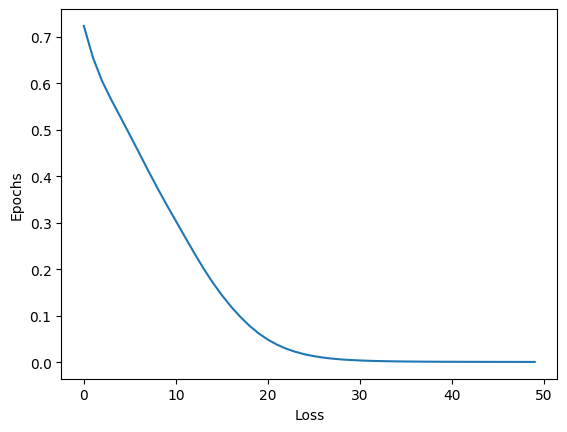

In [ ]:
#plotting ghraph for mlpclassifier
loss_values = model.loss_curve_
plt.plot(loss_values)
plt.ylabel('Epochs')
plt.xlabel('Loss')
plt.show()

In [ ]:
# saving the model
filename = 'e coil_model.pickel'
pickle.dump(model,open(filename , 'wb'))

In [ ]:
genome = "atgctacggtatccgtaaacgttgacctaagctggtacctaactggtagacccttga"
genome_list = list(genome)
print (genome_list)
df_test = pd.DataFrame(genome_list)
df_test = df_test.transpose()


['a', 't', 'g', 'c', 't', 'a', 'c', 'g', 'g', 't', 'a', 't', 'c', 'c', 'g', 't', 'a', 'a', 'a', 'c', 'g', 't', 't', 'g', 'a', 'c', 'c', 't', 'a', 'a', 'g', 'c', 't', 'g', 'g', 't', 'a', 'c', 'c', 't', 'a', 'a', 'c', 't', 'g', 'g', 't', 'a', 'g', 'a', 'c', 'c', 'c', 't', 't', 'g', 'a']


In [ ]:
encoder_dk = pickle.load(open("/content/encoder.pickle",'rb'))
data_test = encoder_dk.transform(df_test).toarray()
print(model.predict(data_test))

[1]
